# **Zadatak 1**

a) Učitati CIFAR-10 skup podataka, i ispisati oblik trening i test podataka i labela

In [15]:
from keras.datasets import cifar10
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [16]:
print("Train X shape: {}".format(trainX.shape))
print("Train Y shape: {}".format(trainy.shape))

print("Test X shape: {}".format(testX.shape))
print("Test Y shape: {}".format(testy.shape))

Train X shape: (50000, 32, 32, 3)
Train Y shape: (50000, 1)
Test X shape: (10000, 32, 32, 3)
Test Y shape: (10000, 1)


b) Pomoću Matplotlib (tj. pyplot) iscrtati prvih 9 slika ovog skupa podataka. Šta možete reći o slikama? Da li ova rezolucija odgovara rezoluciji modernih fotografija? Kako bi rezolucija slike mogla djelovati na rad algoritama i modela mašinskog učenja prilikom klasifikacije?

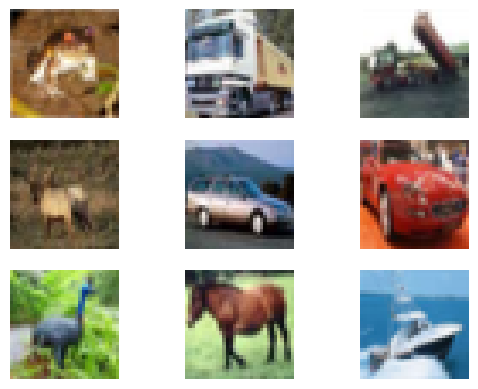

In [17]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(9):
  plt.subplot(331 + i)
  plt.imshow(trainX[i])
  plt.axis('off')
plt.show()

c) Pripremiti podatke za treniranje. Za labele, potrebno je koristiti funkciju to_categorical, dok je za trening podatke potrebno koristiti astype za pretvorbu u floating-point tip, te dijeljenje sa 255 za korak skaliranja podataka.

In [20]:
from keras.utils import to_categorical

trainy = trainy.reshape(-1)
testy = testy.reshape(-1)

trainy = to_categorical(trainy, num_classes=10)
testy = to_categorical(testy, num_classes=10)
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

d) Definisati pomoćnu funkciju za kreiranje modela. Za sada, funkcija će praviti jednostavan CNN (ovo se još naziva i baseline model). Model treba imati sljedeće slojeve:

*   Conv2D sloj sa 32 filtera, dimenzija 3×3, sa uključenim padding-om;
*   Conv2D sloj sa 32 filtera, dimenzija 3×3, sa uključenim padding-om;
*   MaxPooling2D sloj dimenzija 2×2;
*   Conv2D sloj sa 64 filtera, dimenzija 3×3, sa uključenim padding-om;
*   Conv2D sloj sa 64 filtera, dimenzija 3×3, sa uključenim padding-om;
*   MaxPooling2D sloj dimenzija 2×2;
*   Flatten sloj;
*   Dense sloj sa 128 neurona, koji koristi relu aktivacijsku funkciju;
*   Izlazni Dense sloj sa 10 neurona i softmax aktivacijskom funkcijom.

e) Dodati potrebni kod za kompajliranje modela u funkciju define_model. Optimizator treba biti gradient descent uz stopu učenja od 0.001 i momentum od 0.9.
Kompajliranje se treba vršiti na način da se za funkciju gubitka koristi categorical_crossentropy, a za metrike accuracy. Liniju za kompajliranje modela dodati na kraj pomoćne funkcije. Optimizator treba biti SGD definisan u prethodnom podzadatku.

In [5]:
from keras import layers
from keras import models
from keras.optimizers import SGD

def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  return model

f) Sada je potrebno istrenirati model. Parametri koji će biti korišteni za treniranje su sljedeći:
*   epochs=15;
*   batch_size=64;
*   validation_data=(testX, testY) (obično bi se kreirao poseban skup za validaciju, ali u ovom primjeru
ćemo koristiti testni skup);

Izvršiti treniranje i evaluaciju modela. Kolika je postignuta tačnost? Da li je ovo zadovoljavajuće?

In [6]:
print("Train Labels Shape:", trainy.shape)
print("Test Labels Shape:", testy.shape)

Train Labels Shape: (50000, 10)
Test Labels Shape: (10000, 10)


In [ ]:
model = define_model()
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX,testy), verbose=1)

Epoch 1/15
782/782 [==============================] - 283s 360ms/step - loss: 1.6696 - accuracy: 0.3929 - val_loss: 1.3582 - val_accuracy: 0.5093
Epoch 2/15
782/782 [==============================] - 272s 348ms/step - loss: 1.1927 - accuracy: 0.5731 - val_loss: 1.0951 - val_accuracy: 0.6152
Epoch 3/15
782/782 [==============================] - 271s 346ms/step - loss: 0.9588 - accuracy: 0.6605 - val_loss: 0.9425 - val_accuracy: 0.6703
Epoch 4/15
782/782 [==============================] - 270s 345ms/step - loss: 0.8021 - accuracy: 0.7193 - val_loss: 0.9177 - val_accuracy: 0.6881
Epoch 5/15
782/782 [==============================] - 266s 340ms/step - loss: 0.6653 - accuracy: 0.7671 - val_loss: 0.8490 - val_accuracy: 0.7070
Epoch 6/15
782/782 [==============================] - 261s 334ms/step - loss: 0.5518 - accuracy: 0.8065 - val_loss: 0.8598 - val_accuracy: 0.7156
Epoch 7/15
782/782 [==============================] - 268s 342ms/step - loss: 0.4466 - accuracy: 0.8424 - val_loss: 0.9181 -

g) Izvršiti plot ponašanja tačnost i i gubitka kroz epohe. Šta možete zaključiti iz plotova?

In [11]:
def plot_history(history):
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')

  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

  plt.tight_layout()
  plt.show()

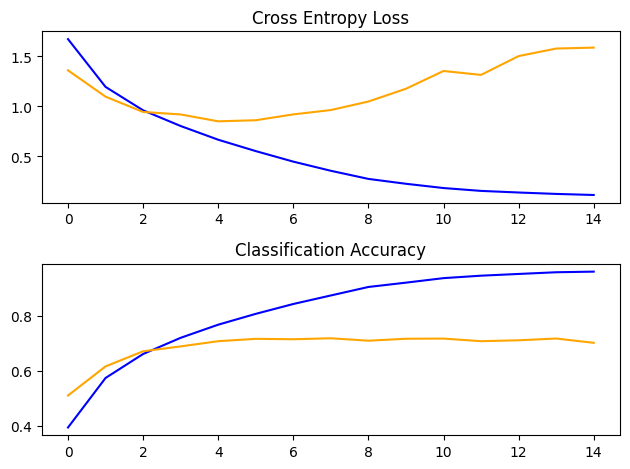

In [12]:
plot_history(history)

h) Dodati Dropout sloj u model, sa vjerovatnoćom od 0.5, prije prvog Dense sloja. Ponoviti treniranje, evaluaciju, i plotanje gubitka i tačnosti. Da li su postignuti rezultati bolji? Da li sada nastaje overfitting?

In [13]:
def define_model_with_dropout():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  return model

In [14]:
model = define_model_with_dropout()
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX,testy))

Epoch 1/15
782/782 [==============================] - 274s 349ms/step - loss: 1.7720 - accuracy: 0.3493 - val_loss: 1.4153 - val_accuracy: 0.4794
Epoch 2/15
782/782 [==============================] - 270s 346ms/step - loss: 1.3397 - accuracy: 0.5193 - val_loss: 1.1664 - val_accuracy: 0.5813
Epoch 3/15
782/782 [==============================] - 268s 343ms/step - loss: 1.1363 - accuracy: 0.5930 - val_loss: 1.0114 - val_accuracy: 0.6404
Epoch 4/15
782/782 [==============================] - 260s 333ms/step - loss: 0.9875 - accuracy: 0.6500 - val_loss: 0.9404 - val_accuracy: 0.6684
Epoch 5/15
782/782 [==============================] - 269s 344ms/step - loss: 0.8833 - accuracy: 0.6865 - val_loss: 0.8359 - val_accuracy: 0.7076
Epoch 6/15
782/782 [==============================] - 272s 348ms/step - loss: 0.8066 - accuracy: 0.7144 - val_loss: 0.8055 - val_accuracy: 0.7201
Epoch 7/15
782/782 [==============================] - 270s 345ms/step - loss: 0.7349 - accuracy: 0.7396 - val_loss: 0.7641 -

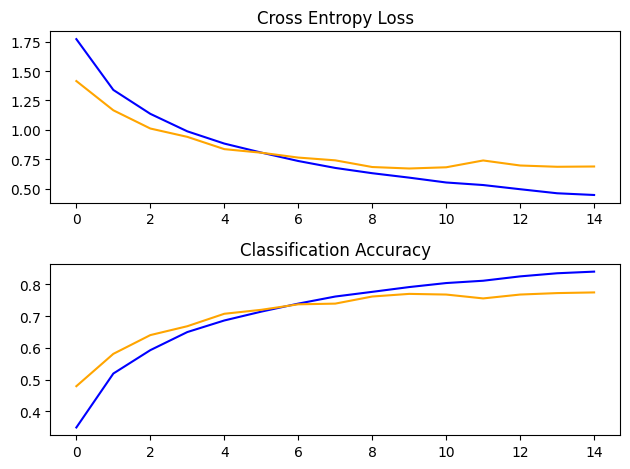

In [15]:
plot_history(history)

i) Sada ćemo napraviti konačnu verziju našeg modela. Nad postojećim modelom, izvršiti sljedeće izmjene:
1. Prije Flatten sloja, dodati još jedan blok od dva Conv2D sloja i jednog MaxPooling2D sloja, po uzoru na već postojeće blokove. Postaviti broj filtera za dva Conv2D sloja na 128;
2. Postojeći Dropout promijeniti na 0.2, te ga pomjeriti nakon prvog Dense sloja;
3. Nakon svakog MaxPooling2d sloja, dodati Dropout sloj sa vjerovatnoćom 0.2.

Ovakav model je potrebno trenirati 30 epoha. Koja je dobijena tačnost? Da li dolazi do overfitting-a?


In [5]:
from keras import layers
from keras import models
from keras.optimizers import SGD

def define_model_final():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))

  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  return model

In [9]:
model = define_model_final()
history = model.fit(trainX, trainy, epochs=30, batch_size=64, validation_data=(testX,testy))

Epoch 1/30
782/782 [==============================] - 14s 11ms/step - loss: 1.9412 - accuracy: 0.2840 - val_loss: 1.6048 - val_accuracy: 0.4159
Epoch 2/30
782/782 [==============================] - 8s 10ms/step - loss: 1.4791 - accuracy: 0.4609 - val_loss: 1.2959 - val_accuracy: 0.5343
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 1.2338 - accuracy: 0.5579 - val_loss: 1.1139 - val_accuracy: 0.5975
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 1.0706 - accuracy: 0.6198 - val_loss: 0.9819 - val_accuracy: 0.6578
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 0.9534 - accuracy: 0.6649 - val_loss: 0.8732 - val_accuracy: 0.6902
Epoch 6/30
782/782 [==============================] - 9s 11ms/step - loss: 0.8662 - accuracy: 0.6959 - val_loss: 0.8089 - val_accuracy: 0.7186
Epoch 7/30
782/782 [==============================] - 8s 11ms/step - loss: 0.7910 - accuracy: 0.7223 - val_loss: 0.7416 - val_accuracy: 0.7464

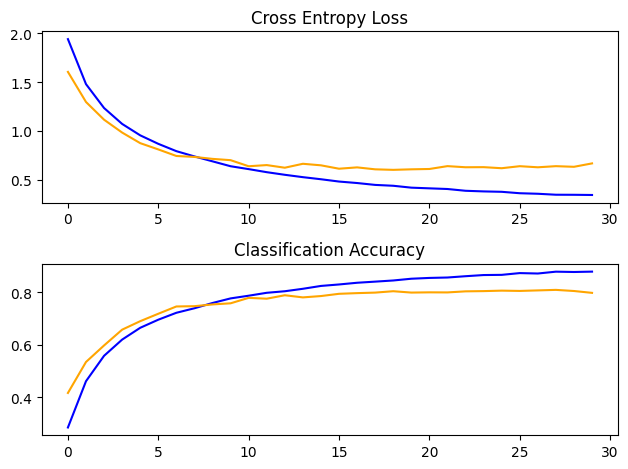

In [13]:
import matplotlib.pyplot as plt
plot_history(history)

In [22]:
model.evaluate(testX, testy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6654 - accuracy: 0.7984


[0.6654154062271118, 0.7983999848365784]